# Lights, Data, Strategy: Informing Microsoft's Movie Studio with Box Office Analytics

1. Business Understanding
a) Introduction.

In an effort to tap into the growing trend of original video content and expand its footprint in the entertainment industry, Microsoft has made the strategic decision to establish its own movie studio. However, being new, Microsoft faces the challenge of understanding which types of films perform exceptionally well. To address this challenge, a data driven analysis is necessary to uncover valuable insights that can guide the decision making process regarding the types of films to start working on. 

The film industry has grown remarkably in recent years, benefiting from technological advancements such as 5G internet, higher quality displays, and smartphones. These new technologies have changed consumer preferences with regard to content access, and in the process companies like Netflix that moved in early to cater to these new appetites benefitted greatly. This shift compelled many tech giants such as Apple and Amazon to venture into movie production, aiming to capitalize on lucrative opportunities the demand presents. Recognizing the potential and profitability, Microsoft seeks to strategically navigate this market, guided by existing data and insights gleaned from it.

The primary objective of this analysis is to identify attributes successful films at the box office share, using comprehensive data sets spanning various aspects of the film industry.By examining historical records, genre trends, and audience preferences, we aim to provide actionable insights to the leadership of Microsoft's new movie studio. 
These insights will guide Microsoft in determining the types of films that are competitive and likely to thrive in this evolving market. 

Through an in-depth exploration of the available data and the application of analytics techniques, we will uncover valuable patterns, correlations, and market trends. Equipped with these data-driven insights, Microsoft will be better positioned to develop a successful film strategy, compete, and increase their chances of success.

b) Defining the metric for success. / Problem statement. 

Microsoft's new movie studio lacks domain expertise in filmmaking and needs guidance on which film genres to focus on to maximize box office success. Leveraging historical box office data and exploring genre trends, this investigation will guide the choice of films they should produce.
To address this problem we will examine datasets containing information on past movie releases, genres, and revenue from these movies. Box office revenues, ROI and ratings data will serve as indicators of financial viability and audience reception across different film genres. These elements will be examined in conjunction with other factors that contribute to a film's success, such as budget, release timing, and target audience demographics to get a more comprehensive understanding of the dynamics that drive box office success. Based on the results of our analysis, we will provide actionable insights and recommendations regarding the film genres that have historically performed well at the box office. These insights will enable Microsoft to align their movie studio's content strategy with audience preferences and market trends and increase the probaility of producing commercially successful films. 
*** To be reviewed ***
The success of our analysis will be measured by the following metrics:

Accuracy of genre performance predictions: Our analysis should accurately identify the film genres that have historically performed well at the box office, enabling Microsoft to make informed decisions.

Revenue increase: The recommendations and insights derived from our analysis should contribute to an increase in box office revenue for Microsoft's movie studio compared to randomly selecting film genres.

Market share growth: Microsoft's movie studio should gain a larger market share within the film industry by producing successful films aligned with audience preferences and market trends.
*** reviewed ***

c) Main objectives and understaning the context 
Main Objective of the Study:
The main objective of this study is to analyze historical film data and identify the most profitable film genres for Microsoft's new movie studio. Outcomes will determine the types of films to create, maximizing the chances of success.

Specific Objectives:
1. To determine the genres with the highest potential for success in the current market by analyzing genre trends and performance to identify film genres that have consistently performed well in terms of revenue and audience reception.

2. To investigate additional factors beyond genre, such as budget, release timing, and target audience demographics, to determine their impact on a film's success. This will allow us to find relationships between genre and other influential elements.

3. Based on the analysis, derive actionable insights and recommendations that align the studio's content strategy with audience preferences and market trends to increase the probability of producing commercially successful films.

d) Experimental Design
** To be updated as we go* 
1. Data collection
2.
3.
4.

e) Data relevance, data understanding. 

2. Reading the Data

In [442]:
# importing libraries. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from collections import Counter
import ast

%matplotlib inline 

In [443]:
# Read the CSV files

tmdb_movies_df = pd.read_csv('data/tmdb_movies.csv')
tn_movie_budgets_df = pd.read_csv('data/tn_movie_budgets.csv', index_col=0 )
bom_movie_gross_df = pd.read_csv('data/bom_movie_gross.csv')



Inspect the contents of the dataframe df.info 

In [444]:
# inspect first 5 records in the list
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [445]:
# Looks like out import added an extra index column, we will have to drop the column and modify our df before we can proceed. 
tmdb_movies_df.drop(tmdb_movies_df.columns[0], axis= 1, inplace= True)

# Inspect our changes 
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [446]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [447]:
tmdb_movies_df.shape

(26517, 9)

What information do we obtain from checking the shape and info of the dataframe?
"""
From our range index there are 26517 rows in the tmdb_movies.csv dataframe. 
There are 8 columns in the tmdb_movies dataframe. 
Non-Null Count is the number of non-null values present in the column. All columns have 26,517 non-null values, indicating that there are no missing values in any of the columns.
Dtype refers to the data type of the values stored in the column. The DataFrame contains columns of three different data types:
    int64: Columns 'id' and 'vote_count' are of integer type.
    object: Columns 'original_language', 'original_title', 'release_date', and 'title' are of object type, which typically represents string values.
    float64: Columns 'popularity' and 'vote_average' are of floating-point type.
"""

Comparing the vote_average(rating) with popularity

In [448]:
# Extract and anlyse ratings from tmdb
ratings_tmdb = tmdb_movies_df['vote_average']

# Calculate the minimum and maximum values
min_rating = ratings_tmdb.min()
max_rating = ratings_tmdb.max()

# Print the range of values
print("Minimum Rating:", min_rating)
print("Maximum Rating:", max_rating)


# aggregation functions. 
print(f'The mean value of the ratings column is {ratings_tmdb.mean():.3f}, median value is {ratings_tmdb.median()}.\
    \nThe standard deviation is {ratings_tmdb.std():.3f}.')


Minimum Rating: 0.0
Maximum Rating: 10.0
The mean value of the ratings column is 5.991, median value is 6.0.    
The standard deviation is 1.853.


On average movies in the tmdb_movies.csv dataset have received a rating of 6.0 and from median approximately 50% of the movies have a rating of below 6.0.
Standard deviation of 1.853 measures dispersion. A larger value indicates greater spread, smaller values indicate data points are clustered around the mean. 
Ratings range from 0 to 10, standard deviation of 1.853 indicates ratings have some variability but are not extremely spread out. 
 

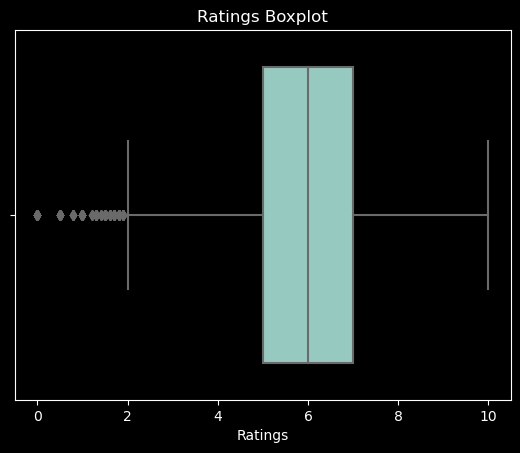

In [449]:
# Select the column for the boxplot
column_data = tmdb_movies_df['vote_average']

# Create the boxplot using Seaborn
sns.boxplot(x=column_data)

# Set the title and labels
plt.title('Ratings Boxplot')
plt.xlabel('Ratings')

# Display the plot
plt.show()


In [450]:
# Filter the DataFrame to keep rows where rating is greater than 2
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['vote_average'] >= 2]

In [451]:
# Extract and anlyse ratings from tmdb
popularity_tmdb = tmdb_movies_df['popularity']

# Calculate the minimum and maximum values
min_popularity= popularity_tmdb.min()
max_popularity= popularity_tmdb.max()

# Print the range of values
print("Minimum Popularity:", min_popularity)
print("Maximum Popularity:", max_popularity)


Minimum Popularity: 0.6
Maximum Popularity: 80.773


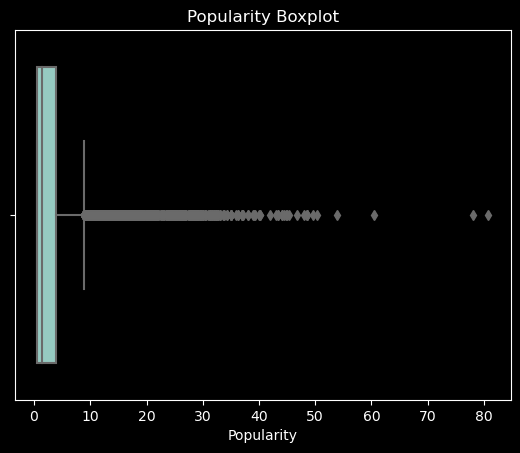

In [452]:
# Select the column for the boxplot
column_data = tmdb_movies_df['popularity']

# Create the boxplot using Seaborn
sns.boxplot(x=column_data)

# Set the title and labels
plt.title('Popularity Boxplot')
plt.xlabel('Popularity')

# Display the plot
plt.show()


In [453]:
# Filter the DataFrame to get movies with popularity rating > 70
popular_movies = tmdb_movies_df[tmdb_movies_df['popularity'] > 40]

# Get the count of movies with popularity rating > 40
num_popular_movies = len(popular_movies)

# Print the result
print("Number of movies with popularity vote > 40:", num_popular_movies)

Number of movies with popularity vote > 40: 23


Very few movies had a popularity vote > 40 in the csv, Investigate. 

In [454]:
# Filter the DataFrame to keep rows where popularity is greater than or equal to 10
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['popularity'] >= 10]

The rating of the movie(vote_average) is influenced by the vote count. We will investigate the distribution of votes before we decide how to deal with movies with low vote count. Understanding the distribution of votes can provide insights into the reliability and representativeness of the ratings.

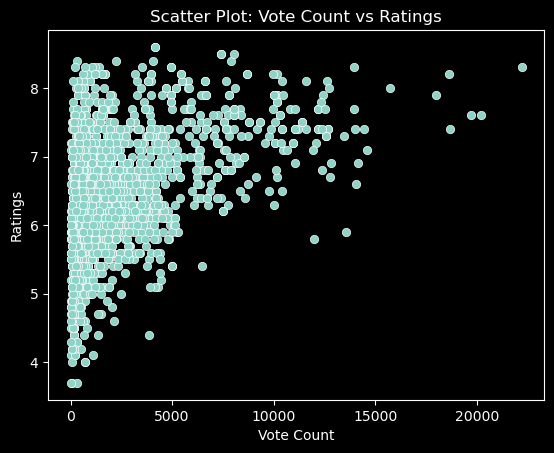

In [455]:
# we compare vote_count and rating

vote_count_data = tmdb_movies_df['vote_count']
ratings_data = tmdb_movies_df['vote_average']

# Create the scatter plot using Seaborn
sns.scatterplot(x=vote_count_data, y=ratings_data)

# Set the title and labels
plt.title('Scatter Plot: Vote Count vs Ratings')
plt.xlabel('Vote Count')
plt.ylabel('Ratings')

# Display the plot
plt.show()


In [456]:

# Define the percentile threshold
percentile_threshold = 75  # Keep movies with vote counts above the 75th percentile

# Calculate the vote count threshold based on the specified percentile
vote_count_threshold = tmdb_movies_df['vote_count'].quantile(percentile_threshold / 100)

# Filter the DataFrame based on the vote count threshold
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['vote_count'] >= vote_count_threshold]

tmdb_movies_df.shape


(421, 9)

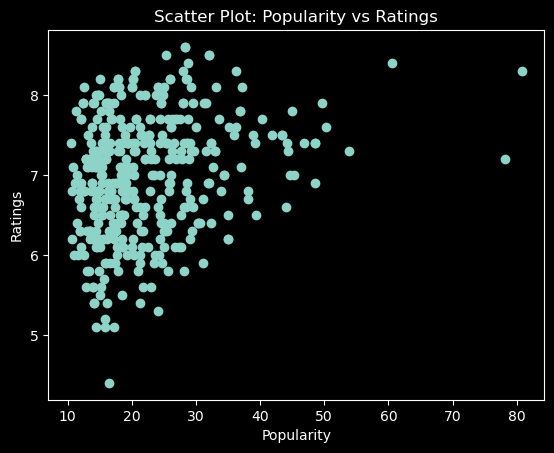

In [457]:
# Select the columns for the scatter plot
popularity_data = tmdb_movies_df['popularity']
ratings_data = tmdb_movies_df['vote_average']

# Create the scatter plot
plt.scatter(popularity_data, ratings_data)

# Set the title and labels
plt.title('Scatter Plot: Popularity vs Ratings')
plt.xlabel('Popularity')
plt.ylabel('Ratings')
filtered_movies
# Display the plot
plt.show()


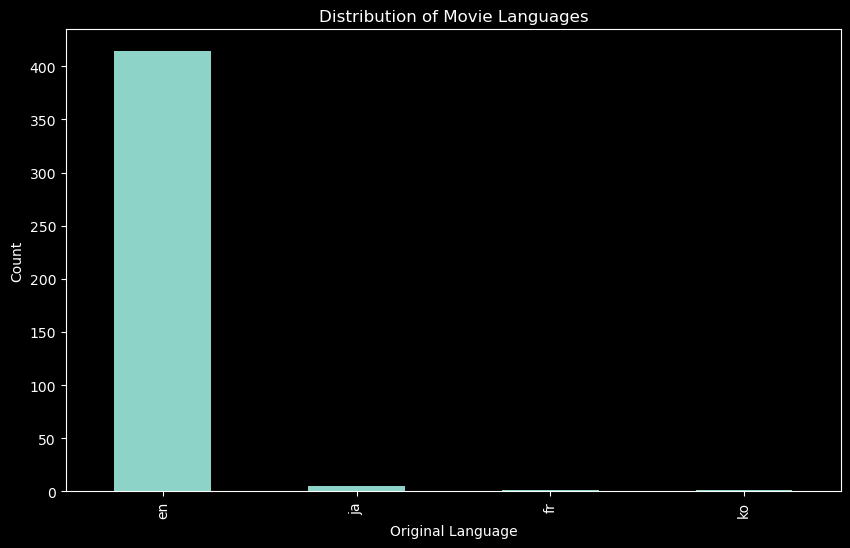

In [458]:
# Count the occurrences of each language
language_counts = tmdb_movies_df['original_language'].value_counts()


plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.title('Distribution of Movie Languages')
plt.show()


In [459]:
# Convert string representations of lists to actual lists
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].apply(lambda x: ast.literal_eval(x))

# Flatten the lists in the 'genre_ids' column
flattened_lists = tmdb_movies_df['genre_ids'].explode().tolist()

# Count the occurrences of each item
genre_counts = dict(Counter(flattened_lists))

# Sort the dictionary by values in descending order
genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

# Display the dictionary
print(genre_counts)



{28: 190, 12: 165, 18: 156, 878: 125, 53: 110, 35: 98, 14: 89, 10751: 63, 80: 50, 16: 48, 10749: 46, 9648: 39, 27: 27, 36: 14, 10752: 12, 37: 8, 10402: 5}


In [462]:
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


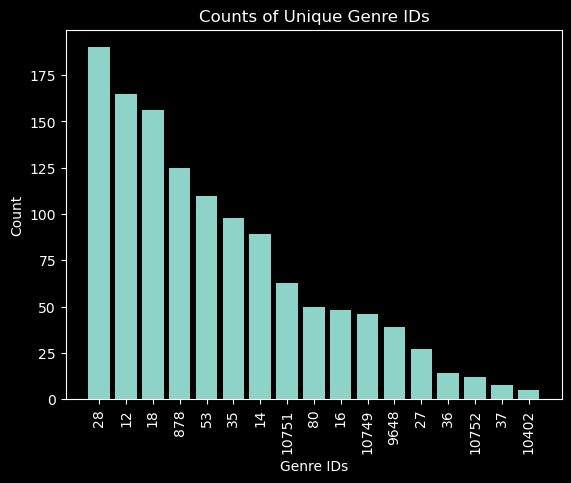

In [463]:
# Extract the genre IDs and counts as separate lists
genres = list(map(str, genre_counts.keys()))
counts = list(genre_counts.values())

# Create a bar plot
plt.bar(genres, counts)
plt.xlabel('Genre IDs')
plt.ylabel('Count')
plt.title('Counts of Unique Genre IDs')
plt.xticks(rotation=90)
plt.show()

Number of occurrences of genre with ID 12: 14


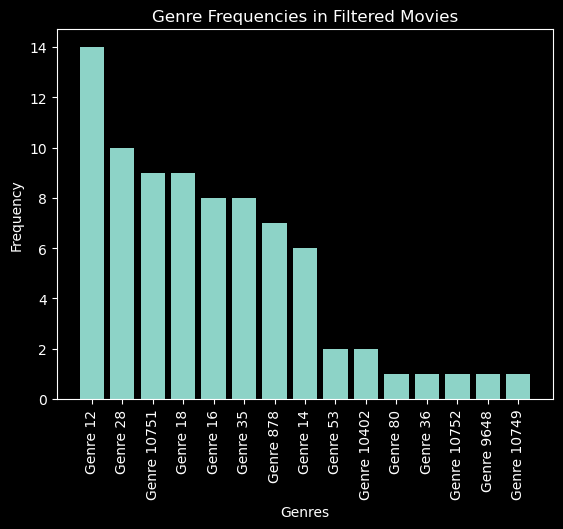

In [471]:
# check the distribution of genres in most popular and highly rated movies. 
# Filter movies rated over 6.5
filtered_df = tmdb_movies_df[tmdb_movies_df['vote_average'] > 7.5]

# Calculate the 50th percentile of popularity
popularity_threshold = filtered_df['popularity'].quantile(0.75)

# Filter movies with popularity above the 50th percentile
filtered_df = filtered_df[filtered_df['popularity'] > popularity_threshold]

# Explode 'genre_ids' and count occurrences of each genre
genre_counts = filtered_df['genre_ids'].explode().value_counts()

# verify it worked by checking the count of genre with ID 12
genre_count = genre_counts.get(12, 0)

print("Number of occurrences of genre with ID 12:", genre_count)
 
# Get the genre labels as strings
genre_labels = ['Genre ' + str(genre_id) for genre_id in genre_counts.index]

# Plot the bar chart
plt.bar(genre_labels, genre_counts.values)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Genre Frequencies in Filtered Movies')
plt.xticks(rotation=90)
plt.show()

In [474]:
# Sort genre frequencies in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 genres
top5_genres = [genre_id for genre_id, count in sorted_genres[:5]]

# Filter the DataFrame to include rows with top 5 genres
filtered_rows = tmdb_movies_df[tmdb_movies_df['genre_ids'].apply(lambda x: any(g in x for g in top5_genres))]

# Print the filtered rows
print(filtered_rows)


                 genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
23897     [28, 12, 35, 14]  353486                en   
23903          [18, 10751]  406997                en   
23922             [80, 18]  359940                en   
23960             [35, 18]  391713                en   
23964       [80, 18, 9648]  392044                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3      

In [184]:

# threshold values for ratings and popularity
rating_threshold = 8.0
popularity_threshold = 20

# Filter the DataFrame based on the criteria
filtered_movies = tmdb_movies_df[(tmdb_movies_df['vote_average'] >= rating_threshold) & (tmdb_movies_df['popularity'] >= popularity_threshold)]
filtered_movies.shape
# Perform analysis on the filtered dataset
# You can explore various aspects of successful movies, such as:
# - Genres: Analyze which genres are more prevalent in successful movies
# - Directors/Actors: Identify influential directors or actors associated with successful movies
# - Budget and revenue: Examine the relationship between budget, revenue, and success
# - Release date: Analyze if the release time or season affects the success of movies

# Example analysis: Genre distribution of successful movies
# genre_counts = filtered_movies['genre'].value_counts()
# print("Genre distribution of successful movies:")
# print(genre_counts)


(31, 9)

In [32]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [33]:
bom_movie_gross_df.shape

(3387, 5)

In [34]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [35]:
tn_movie_budgets_df.shape

(5782, 5)

In [37]:
tn_movie_budgets_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [38]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Identiy and handle missing values

In [ ]:
clean the data, text files numbers etc

Explore data distributions matplotlib

Explore differences between subsets

In [ ]:
Explore correlations

In [ ]:
Engineer and explore new features